In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [117]:
# Load the .txt data
file_path = "../src/data/MachineLearningRating_v3.txt"
data = pd.read_csv(file_path, sep="|")

# Display the first few rows
data.head(1000)


C:\Users\Home\AppData\Local\Temp\ipykernel_344\3073750881.py:3: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path, sep="|")


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,129091,11030,2015-03-01 00:00:00,False,,Individual,Dr,English,Standard Bank,Current account,...,No excess,Keys and Alarms,Keys and Alarms,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,5.124123,0.0
996,129091,11030,2015-05-01 00:00:00,False,,Individual,Dr,English,Standard Bank,Current account,...,No excess,Keys and Alarms,Keys and Alarms,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,5.124123,0.0
997,129091,11030,2015-07-01 00:00:00,False,,Individual,Dr,English,Standard Bank,Current account,...,No excess,Keys and Alarms,Keys and Alarms,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,5.124123,0.0
998,129090,11030,2015-02-01 00:00:00,False,,Individual,Dr,English,Standard Bank,Current account,...,No excess,Emergency Charges,Emergency Charges,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,7.686316,0.0


In [118]:
# Check for missing values
null_values = data.isnull().sum()
print("Sum of Null Values in Each Column:")
print(null_values)

# Check data types
data_types = data.dtypes
print("\nData Types of Columns:")
print(data_types)


Sum of Null Values in Each Column:
UnderwrittenCoverID               0
PolicyID                          0
TransactionMonth                  0
IsVATRegistered                   0
Citizenship                       0
LegalType                         0
Title                             0
Language                          0
Bank                         145961
AccountType                   40232
MaritalStatus                  8259
Gender                         9536
Country                           0
Province                          0
PostalCode                        0
MainCrestaZone                    0
SubCrestaZone                     0
ItemType                          0
mmcode                          552
VehicleType                     552
RegistrationYear                  0
make                            552
Model                           552
Cylinders                       552
cubiccapacity                   552
kilowatts                       552
bodytype                     

In [88]:
data.dropna(subset=['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth', 'Country', 'Province', 'PostalCode', 'CapitalOutstanding'], inplace=True)

In [89]:
# Replace nulls with "Unknown" in categorical columns
for col in ['MaritalStatus', 'Gender', 'Language', 'Bank', 'AccountType', 'LegalType', 'Title']:
    data[col] = data[col].fillna('Unknown')


In [119]:
# filling null and numerical columns with the medians
for col in ['Cylinders', 'cubiccapacity', 'kilowatts', 'SumInsured', 'TotalPremium', 'TotalClaims','mmcode', 'NumberOfDoors', 'TotalPremium', 'TotalClaims']:
    data[col] = data[col].fillna(data[col].median())


In [120]:
# filling the bool columns with the highest mode 
for col in ['AlarmImmobiliser', 'TrackingDevice', 'IsVATRegistered', 'NewVehicle', 'WrittenOff','VehicleType', 'make', 'Model','bodytype','VehicleIntroDate']:
    data[col] = data[col].fillna(data[col].mode()[0])

In [121]:
# drop columns with highest percentages
data.drop(columns=['CustomValueEstimate', 'CrossBorder', 'NumberOfVehiclesInFleet', 'Rebuilt', 'Converted'], inplace=True)

In [122]:
# fix the date if it is not in the correct format
data['TransactionMonth'] = pd.to_datetime(data['TransactionMonth'], errors='coerce')
data['VehicleIntroDate'] = pd.to_datetime(data['VehicleIntroDate'], errors='coerce')

C:\Users\Home\AppData\Local\Temp\ipykernel_344\1225106849.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['VehicleIntroDate'] = pd.to_datetime(data['VehicleIntroDate'], errors='coerce')


In [123]:
numerical_columns = ['mmcode', 'NumberOfDoors', 'TotalPremium', 'TotalClaims']
for col in numerical_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')


In [124]:
# Check for remaining null values
print(data.isnull().sum())

# Confirm data types
print(data.dtypes)


UnderwrittenCoverID              0
PolicyID                         0
TransactionMonth                 0
IsVATRegistered                  0
Citizenship                      0
LegalType                        0
Title                            0
Language                         0
Bank                        145961
AccountType                  40232
MaritalStatus                 8259
Gender                        9536
Country                          0
Province                         0
PostalCode                       0
MainCrestaZone                   0
SubCrestaZone                    0
ItemType                         0
mmcode                           0
VehicleType                      0
RegistrationYear                 0
make                             0
Model                            0
Cylinders                        0
cubiccapacity                    0
kilowatts                        0
bodytype                         0
NumberOfDoors                    0
VehicleIntroDate    

In [125]:
data.to_csv('../src/data/cleaned_data.csv', index=False)

In [126]:
# Select numerical columns
numerical_columns = ['TotalPremium', 'TotalClaims', 'Cylinders', 'cubiccapacity', 'kilowatts', 'SumInsured']

# Calculate variability metrics
variability_metrics = {}
for col in numerical_columns:
    variability_metrics[col] = {
        'Mean': data[col].mean(),
        'Standard Deviation': data[col].std(),
        'Variance': data[col].var(),
        'Range': data[col].max() - data[col].min(),
        'IQR': data[col].quantile(0.75) - data[col].quantile(0.25),
    }

# Convert to a DataFrame for better display
variability_df = pd.DataFrame(variability_metrics).T

# Display the results
print(variability_df)


                        Mean  Standard Deviation      Variance         Range  \
TotalPremium       61.905496        2.302845e+02  5.303096e+04  6.606518e+04   
TotalClaims        64.861190        2.384075e+03  5.683812e+06  4.050945e+05   
Cylinders           4.046616        2.939410e-01  8.640131e-02  1.000000e+01   
cubiccapacity    2466.868692        4.427106e+02  1.959927e+05  1.288000e+04   
kilowatts          97.215532        1.939061e+01  3.759957e+02  3.090000e+02   
SumInsured     604172.732589        1.508332e+06  2.275065e+12  1.263620e+07   

                         IQR  
TotalPremium       21.929825  
TotalClaims         0.000000  
Cylinders           0.000000  
cubiccapacity     457.000000  
kilowatts          36.000000  
SumInsured     245000.000000  


In [127]:
cleaned_data = pd.read_csv('../src/data/cleaned_data.csv')

C:\Users\Home\AppData\Local\Temp\ipykernel_344\3781239491.py:1: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  cleaned_data = pd.read_csv('../src/data/cleaned_data.csv')


In [129]:
cleaned_data.describe()
cleaned_data.head()

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


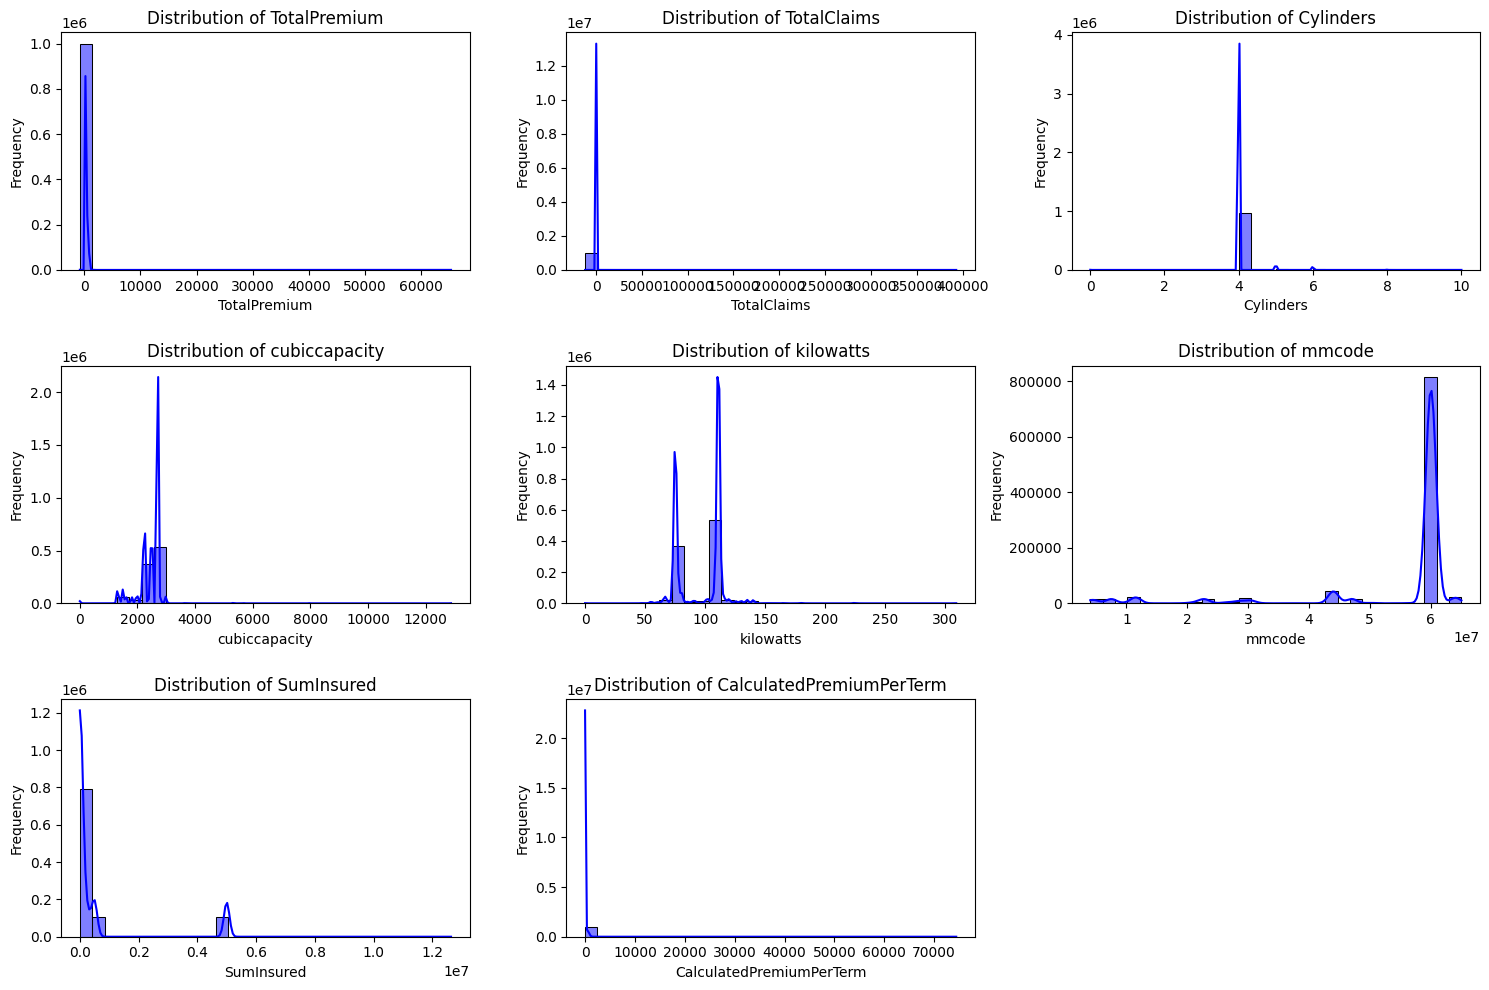

C:\Users\Home\AppData\Local\Temp\ipykernel_344\4157413453.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')
C:\Users\Home\AppData\Local\Temp\ipykernel_344\4157413453.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')
C:\Users\Home\AppData\Local\Temp\ipykernel_344\4157413453.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')
C:\Users\Home\AppData\

ValueError: num must be an integer with 1 <= num <= 15, not 16

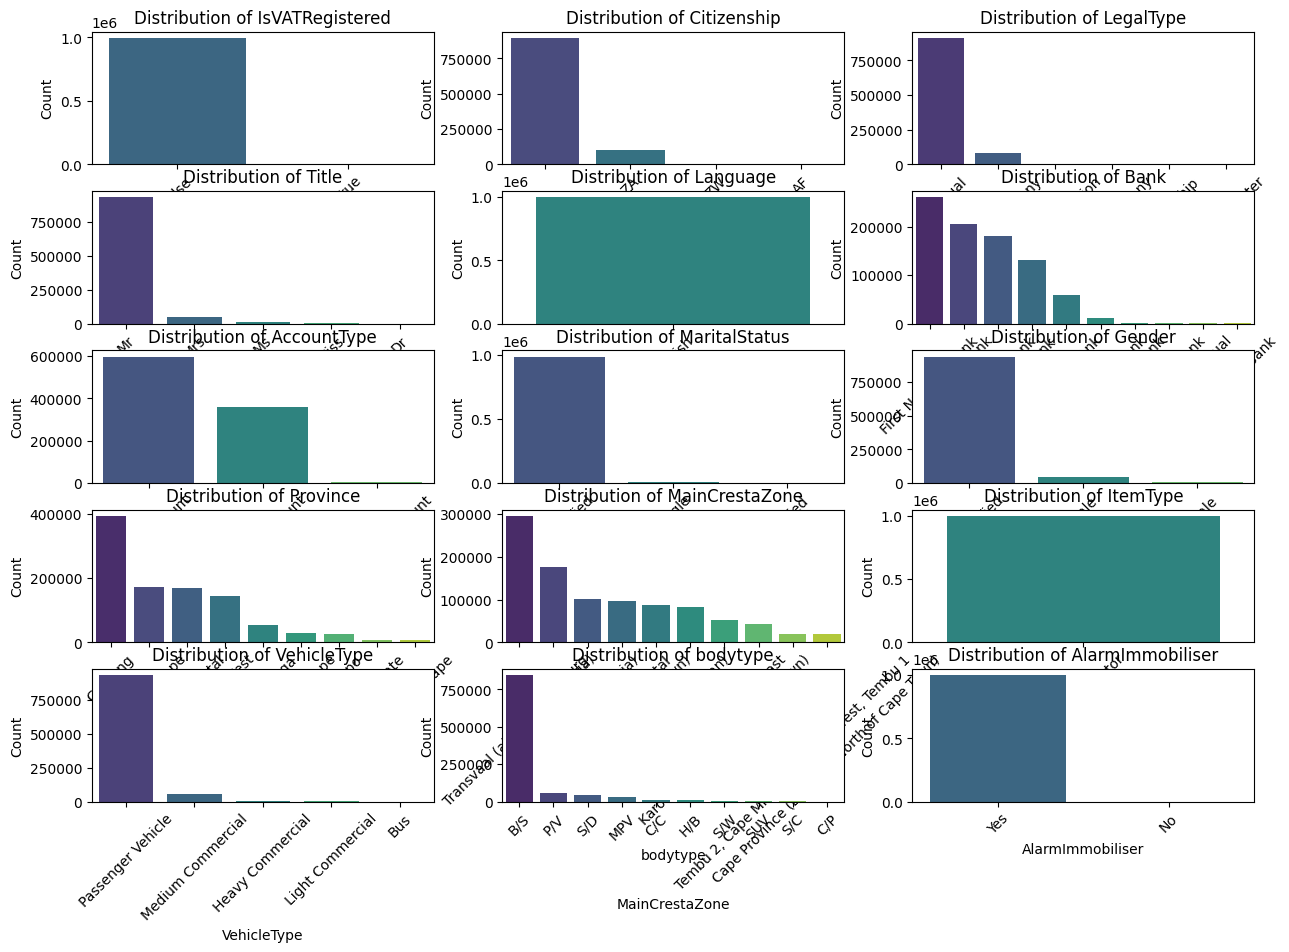

In [135]:
# Define numerical and categorical columns based on the provided data types
numerical_columns = [
    'TotalPremium', 'TotalClaims', 'Cylinders', 'cubiccapacity', 
    'kilowatts', 'mmcode', 'SumInsured', 'CalculatedPremiumPerTerm'
]
categorical_columns = [
    'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language', 
    'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Province', 
    'MainCrestaZone', 'ItemType', 'VehicleType', 'bodytype', 
    'AlarmImmobiliser', 'TrackingDevice', 'NewVehicle', 'WrittenOff', 
    'CoverCategory', 'CoverType', 'CoverGroup', 'Product'
]

# Plot histograms for numerical columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(cleaned_data[col], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Plot bar charts for categorical columns (limiting to top 10 categories for clarity)
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(5, 3, i)
    value_counts = cleaned_data[col].value_counts().head(10)
    sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
